# Qiskit 개발자 자격 시험 연습용 노트북

개발자 자격증 시험은, 사실 여러분의 양자 정보 이론에 대한 `지식`을 확인하는 시험은 아닙니다. 양자 회로를 작성하는 기술과, 그에 필요한 아주 간단한 양자 정보학적인 지식을 검증하는 시험일 뿐입니다.

따라서, 지금부터 진행될 총 다섯번의 코딩 실습 시간에는 여러분의 손에, Qiskit 구문이 익숙해 지도록, 최대한, 여러분께서 직접 코딩을 해보시도록 시간을 드리려 합니다. 

이번 강의는 2025년 Qiskit Global Summer School에서 기본적인 Qiskit 코딩을 익혔다는 가정하에, 그리고 파이썬 코딩의 기본 문법들이 손에 익숙해 졌다는 가정하에 진행 됩니다. 하지만! 혹시 수료를 위해 너무 바쁘게 인증을 마친 분들이 계실 수 있으니 첫번째 섹션에서 아주 기본적인 내용들을 다시 한 번 점검한 후 넘어가 보도록 합시다.

우선 여러분이 적절한 환경에서 실습 중인지 버젼을 한 번 확인해 봅시다.

In [2]:
import qiskit
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit version: 2.1.1
Runtime version: 0.41.0


In [3]:
import numpy as np
from math import sqrt, pi
from qiskit.visualization.array import array_to_latex

## 0교시: 기본기 톧아보기 - 유용한 파이썬 기본 구문을 다시 한번 살펴보기


1. list를 만드는 유용한 방법

이름이 a인 다음의 리스트를 만들어 보세요: [2,3,4,5,6]

In [4]:
# define with value
a= [2,3,4,5,6]
print(a)

[2, 3, 4, 5, 6]


In [5]:
# use range()
a = list(range(2,7))
print(a)

[2, 3, 4, 5, 6]


In [6]:
# use append() and for loop
a = []
for i in range(2,7):
    a.append(i)
print(a)

[2, 3, 4, 5, 6]


2. Dictionary 를 다뤄보기

a 라는 이름의 다음의 key 와 value를 갖는 dictionary를 만들어 보세요 

| key | value | 
| --- | --- |
| '00' | 10 |
| '11' | 1014 |

In [7]:
#define
a = { 
    '00' : 10,
    '11' : 1014
}

In [8]:
#add key and value
a = {}
a["00"] = 10
a["11"] = 1014
#your code here

만들어진 dictionary의 '00' key의 값을 가져와 봅시다.

In [9]:
#your code
a.get('00')

10

만들어진 dictionary의 key 값만을 출력해 봅시다. 또한 value 값만을 출력해 봅시다.

In [10]:
#your code
print(a.keys())
print(a.values())

dict_keys(['00', '11'])
dict_values([10, 1014])


Dictionary 에 '01' 인 키가 있는지 없는지 확인해 봅시다.


In [11]:
#your code
'01' in a.keys()

False

Dictionary에 '11'인 키가 있는지 없는지 확인해 봅시다.

In [12]:
#your code
'11' in a.keys()

True

3. 행렬을 만들고 다루기

임의의 Bra, Ket 행렬 만들어 보기

$$a = \begin{bmatrix} 0 & 1 \end{bmatrix}, b = \begin{bmatrix} 0 \\1 \end{bmatrix}$$
를 만들어 봅시다.

In [13]:
#your code here
a = [0,1]
b = [
    [0],
    [1]
]

numpy를 이용하여 R이란 이름의 2x2 랜덤 행렬을 만들고 각각의 row값과 column 값을 list 로 저장해 봅시다.

In [14]:
#your code here

R = np.random.random((2,2))

array_to_latex(R)

<IPython.core.display.Latex object>

In [15]:
R_row0 = R[0, :]
array_to_latex(R_row0)

<IPython.core.display.Latex object>

In [16]:
R_row1 = R[1, :]
array_to_latex(R_row1)

<IPython.core.display.Latex object>

In [17]:
R_col0 = R[:,0]
array_to_latex(R_col0)

<IPython.core.display.Latex object>

In [18]:
R_col1 = R[:,1]
array_to_latex(R_col1)

<IPython.core.display.Latex object>

4. 간단한 함수를 만들어 봅시다

2x2 행렬을 입력으로 받아서 각각의 row와 column을 반환하는 함수를 만들어 봅시다.

In [19]:
def slice_matrix( Input ):
    row0 = Input[0, :]
    row1 = Input[1, :]
    col0 = Input[: ,0]
    col1 = Input[: ,1]
    return row0, row1, col0, col1

함수가 잘 만들어 졌는지 아래의 셀을 실행해 확인해 봅시다.

In [20]:
result = slice_matrix(R)
for a in result:
    display(array_to_latex(a))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

위에서 만들어진 리스트들을 사용하여, 행렬간의 덧셈, 뺄셈, 상수 곱셈, 내적을 해봅시다.

In [21]:
#row0과 row1을 더 해봅시다.

print(result[0] + result[1])

[0.26034908 1.24136025]


In [22]:
#row0에 5를 곱해 봅시다

print(result[0] * 5)

[0.96826647 3.86955196]


In [23]:
#row0과 col1을 내적해 봅시다.

np.matmul(result[0],result[3])

np.float64(0.5116345961856538)

5. 복소수 행렬을 정의해 봅시다.

$$ c1 = \begin{bmatrix} 1 + 2i & 3+ 6i \end{bmatrix}, c2 = \begin{bmatrix} 3 - i \\ 2 + i \end{bmatrix} $$
를 정의하고 내적을 계산해 봅시다.

In [25]:
c1 = [1+2j, 3+6j]
c2 = [
    [3-1j],
    [2+1j]
]
np.matmul(c1, c2).item()

(5+20j)

## 1교시 : 양자 회로의 작성 및 단일 큐비트 게이트, 파울리 게이트들

### 1-1 양자 회로를 선언하는 여러가지 방법: 

가장 먼저 실습의 기본이 되는 양자 회로를 선언하는 법을 먼저 살펴 봅시다.

In [26]:
from qiskit import QuantumCircuit

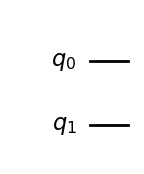

In [35]:
# 2개의 큐비트를 갖는 이름이 qc0인 양자 회로를 선언해 보세요

qc0 = QuantumCircuit(2)
qc0.draw('mpl')


In [36]:
#qc0의 .qubits 속성을 확인해 보세요

qc0.qubits

[<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]

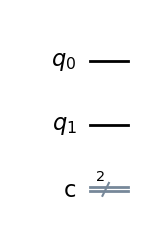

In [47]:
# 2개의 큐비트와 2개의 고전 비트를 갖는, 이름이 qc1인 양자 회로를 선언해 보세요

qc1 = QuantumCircuit(2,2)
qc1.draw('mpl')


In [45]:
from qiskit import QuantumRegister, ClassicalRegister

In [49]:
# 변수명 qr인 3개의 양자 비트를 1) 회로에 q라는 이름으로 표시되도록 선언해 보세요
qr = QuantumRegister(3,name='q')

In [50]:
# 변수명 cr인 3개의 고전 비트를 1) 회로에 c라는 이름으로 표시되도록 선언해 보세요

cr = ClassicalRegister(3,name = 'c')

In [51]:
# 변수명 scratch인 1개의 양자비트를 회로에 표시되는 이름이 scratch가 되도록 선언한 후,  qr과 scratch, cr을 사용하여 이름이 qc인 양자 회로를 선언해 보세요

scratch = QuantumRegister(1,name = 'scratch')

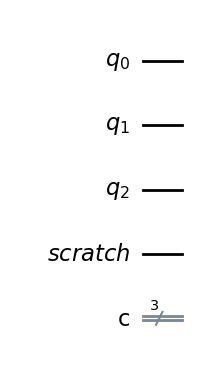

In [53]:
qc = QuantumCircuit(qr,cr,scratch)
qc.draw('mpl')

### 1-2 단일 큐비트 게이트로 회로를 만들어 봅시다.

각각의 단일 큐비트 게이트의 기능과 특징에 대해서는 코딩 실습 시간에 다루지는 않겠습니다. 혹 각 단일 게이트의 기능이 확실히 이해가 되지 않는다면, [Qiskit Circuit Library](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library) 페이지를 참고해 주세요.

In [54]:
from qiskit.visualization import * #양자상태를 시각화 하기 위해 qiskit.visualization 불러오기
from qiskit.quantum_info import Statevector #Qiskit에서 지원하는 Statevector 클래스 불러오기

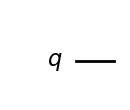

In [ ]:
# 이름이 qc_x인 1큐비트 양자회로를 선언하고 x 게이트를 적용해봅니다.

qc_x = QuantumCircuit(1)
qc.x(0)

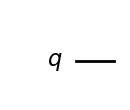

In [57]:
# qc_x를 'matplotlib'형식으로 그려봅시다. (힌트: matplotlib을 줄이면..?!)
qc_x.draw('mpl')



In [58]:
#Statevector 함수를 사용해서 qc_x의 Statevector를 계산해 봅시다.
Statevector(qc_x)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [59]:
# array_to_latex()를 사용해서 상태 백터를 보기 좋게 출력해 봅시다.

array_to_latex(Statevector(qc_x))

<IPython.core.display.Latex object>

다음 그림과 같은 양자 회로를 작성하고 이를 png 파일의 그림으로 저장해 보세요.

<img src="img/ex1.png" width=800/>

회로를 그린 그림을 저장하는 법이 헷갈린다면 1 Minute Qiskit의 [How can I save Circuit Drawings to Different File Types?](https://www.youtube.com/watch?v=NcIBMBnV1y0)를 잠시 확인해 보세요. 

In [64]:
## your code
qc = QuantumCircuit(4)
qc.h(0)
qc.p(np.pi/2, 0)
qc.ry(np.pi/8, 0)
qc.y(0)
qc.rz(np.pi/2,1)
qc.t(1)
qc.tdg(1)
qc.u(np.pi/2,0,np.pi,1)
qc.id(2)
qc.id(2)
qc.rx(np.pi/4,2)
qc.sx(2)
qc.y(2)
qc.z(2)
qc.s(3)
qc.sdg(3)
qc.x(3)
qc.y(3)

qc.draw('mpl').savefig('1')

### 1-3 다중 큐비트 게이트로 회로를 만들어 봅시다.

앞의 실습과 마찬가지로 이번 실습에서는, 각 다중 큐비트 게이트에 대한 설명은 하지 않겠습니다. 혹시 각 다중 큐비트 게이트의 기능이 확실히 이해가 되지 않는다면, [Qiskit Circuit Library](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library) 페이지를 참고해 주세요.

가장 먼저 CX게이트를 사용한 실습을 해봅시다.

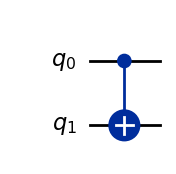

In [65]:
# 2개의 큐비트를 갖는 qc라는 이름의 양자 회로를 선언해 봅시다.
# 그 후, 0번 큐비트를 컨트롤 큐비트로, 1번 큐비트를 target 큐비트로 지정하는 cx게이트를 추가한 후
# matplotlib형태로 회로를 출력해 보세요. 


qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')

다음 그림과 같은 양자 회로를 작성해 보세요.

<img src="img/ex2.png" width=800/>


In [90]:
# your code

qc =QuantumCircuit(4)
qc.ccx(0,1,2)
qc.ch(0,1)
qc.crx(np.pi/2,2,3)
qc.cp(np.pi/4,0,1)
qc.crz(np.pi/4,0,1)
qc.cswap(0,2,3)
qc.csx(0,1)
qc.cx(2,3)
qc.cu(np.pi/2,0,np.pi,0,0,1)
qc.cy(2,3)
qc.cz(1,2)
qc.iswap(0,1)
qc.dcx(2,3)
qc.mcp(np.pi/4,[0,1,2],3)
qc.mcx([0,1,2],3)
qc.swap(2,3)

qc.draw('mpl').savefig('2')

### 1-4 베리어와 양자 회로의 특성을 확인해 봅시다.

이제 양자 회로에서 barrier의 기능과 양자회로의 각종 특성을 확인하는 명령어들을 확인해 봅시다.

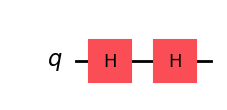

In [93]:
# qc1이라는 이름의 큐비트 하나로 구성된 양자회로를 선언하고, 하다마드 게이트를 두번 적용한 후 matplotlib 형태로 출력해 봅시다.
qc1 = QuantumCircuit(1)

for i in range(2):
    qc1.h(0)
qc1.draw('mpl')

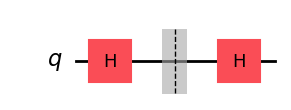

In [94]:
# qc2라는 이름의 큐비트 하나로 구성된 양자회로를 선언하고, 하다마드 게이트를 한번 적용한 후 barrier를 삽입하고, 다시 한번 하다마드 게이트를 적용한 후 matplotlib 형태로 출력해 봅시다.
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.barrier()
qc2.h(0)
qc2.draw('mpl')

이제 아래의 두셀을 실행해 보세요.

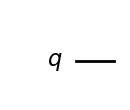

In [95]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator

backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend)
tp_qc1 = pm.run(qc1)

tp_qc1.draw('mpl')

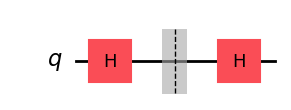

In [96]:
tp_qc2 = pm.run(qc2)

tp_qc2.draw('mpl')

위에서 보셨듯이, 배리어는 양자회로가 transpile될때 배리어를 기준으로 함께 tranpile되지 않게 해줍니다. 이 barrier를 사용해 다음의 예제 회로를 작성해 보세요. 양자 회로의 이름은 여러분이 원하는대로 지어 보세요.

<img src="img/ex3.png" width=800/>


In [98]:
# your code
qc3 = QuantumCircuit(2)

qc3.h(0)
qc3.h(1)
qc3.barrier()
qc3.x(0)
qc3.x(0)
qc3.s(1)
qc3.barrier(1)
qc3.s(1)

qc3.draw('mpl').savefig('3')

.depth()함수를 사용해 이 회로의 depth를 계산해 봅시다.

In [ ]:
#최대 게이트 수
qc3.depth()

3

.size() 함수를 사용해 이 회로의 크기를 계산해 봅시다.

In [ ]:
#총 게이트 수
qc3.size()

6

.width()함수를 사용해 이 회로의 넓이를 계산해 봅시다.

In [ ]:
#큐빗 수
qc3.width()

2

다음과 같은 양자회로를 작성해 보세요.

<img src="img/ex4.png" width=800/>

이 회로의 depth, size, width를 모두 확인해 봅시다.

In [109]:
#your code
qc4 = QuantumCircuit(3)

qc4.h(0)
qc4.h(1)
qc4.x(2)
qc4.ccx(0,1,2)
qc4.ry(np.pi,0)
qc4.ch(1,2)
qc4.cx(1,0)
qc4.tdg(2)
qc4.measure_all()
qc4.draw('mpl')

depth = qc4.depth()
size = qc4.size()
width = qc4.width()


print(depth, " ", size, " ", width)

5   11   6


.clbits 를 사용해 이 회로의 고전 비트 정보들을 확인해 봅시다.

In [110]:
qc4.clbits

[<Clbit register=(3, "meas"), index=0>,
 <Clbit register=(3, "meas"), index=1>,
 <Clbit register=(3, "meas"), index=2>]

.data 를 사용해 이 회로의 오퍼레이터들을 확인해 봅시다.

In [111]:
qc4.data

[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=1>,), clbits=()), CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=2>,), clbits=()), CircuitInstruction(operation=Instruction(name='ccx', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=()), CircuitInstruction(operation=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[3.141592653589793]), qubits=(<Qubit register=(3, "q"), index=0>,), clbits=()), CircuitInstruction(operation=Instruction(name='ch', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), i

.global_phase 를 사용해 이 회로가 만들어 내는 전역 위상을 확인해 봅시다.

In [112]:
qc4.global_phase

0.0

.num_clbits를 사용해 이 회로의 고전 비트의 개수를 확인해 봅시다.

In [113]:
qc4.num_clbits

3

.num_qubits를 사용해 이 회로의 큐비트의 개수를 확인해 봅시다.

In [114]:
qc4.num_qubits

3

.qubits를 사용해 이회로의 큐비트에 대한 정보를 확인해 봅시다.

10 분 휴식한 후! 양자 회로 작성에 대한 나머지 부분과 양자회로의 측정, OpenQasm을 실습해 봅시다.

In [115]:
qc4.qubits

[<Qubit register=(3, "q"), index=0>,
 <Qubit register=(3, "q"), index=1>,
 <Qubit register=(3, "q"), index=2>]